# Homework 3

### Summary

This homework is mainly about working with data frames and extracting the relevant data to make various plots. Through out the report we will mainly look at diffrent type of visualizations, analysis and cleaning up data frames. The report will mainly consist of csv files with diffrent content, we will look at cell phone calls, observations of diffrent bird species and come back to look at the data regarding strokes. 

### Exploratory Data Analysis

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('IRIS.csv')
print(df.head(10)) # just inspecting the dataset/dataframe to understand it better

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


### The relationship between sepal and petal dimensions

At first glans we can identify that sepal lenght of the various species have diffrent kind's of lenght and when looking at the other plot beneth it we can observe that the Iris-setosa for example have rather larger width with respect to the Sepal. It is worth noting that the dataframe is not that significant with respect to the observations made. 

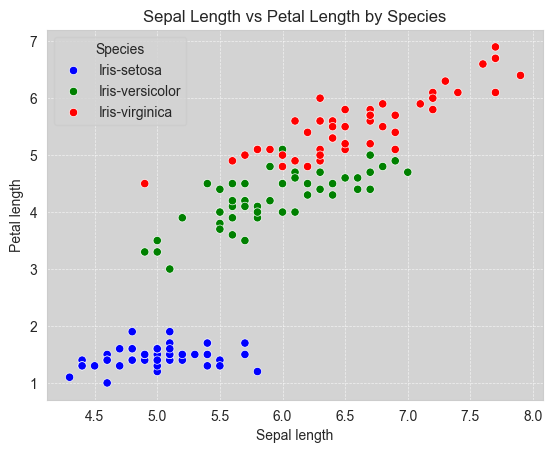

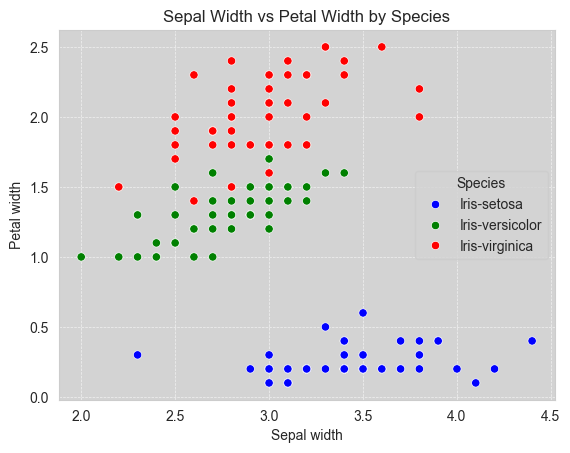

In [136]:
# make pairs plot for petal_length and sepal_length
# make pairs plot for sepal_width and  petal_width
sns.set_style("whitegrid", {
    'axes.facecolor': 'lightgrey',  # Light grey background
    'grid.color': 'white'          # White grid lines
})

def scatter_plot(data, x, y, hue, title, palette):
    sns.scatterplot(data=data, x=x, y=y, hue=hue, palette=palette)
    plt.title(title)
    plt.xlabel(x.replace('_', ' ').capitalize())
    plt.ylabel(y.replace('_', ' ').capitalize())
    plt.legend(title=hue.capitalize())
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

# Plot for sepal_length vs. petal_length
scatter_plot(
    data=df, 
    x='sepal_length', 
    y='petal_length', 
    hue='species', 
    title='Sepal Length vs Petal Length by Species', 
    palette=['blue', 'green', 'red']
)

# Plot for sepal_width vs. petal_width
scatter_plot(
    data=df, 
    x='sepal_width', 
    y='petal_width', 
    hue='species', 
    title='Sepal Width vs Petal Width by Species', 
    palette=['blue', 'green', 'red']
)

### Identifying the distribution of the sepal and petal dimensions

C:\Users\tonyf\AppData\Local\Temp\ipykernel_17032\76731630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=var, palette=['blue', 'green', 'red'], ax=ax)
C:\Users\tonyf\AppData\Local\Temp\ipykernel_17032\76731630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=var, palette=['blue', 'green', 'red'], ax=ax)
C:\Users\tonyf\AppData\Local\Temp\ipykernel_17032\76731630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=var, palette=['blue', 'green', 'red'], ax=ax)
C:\U

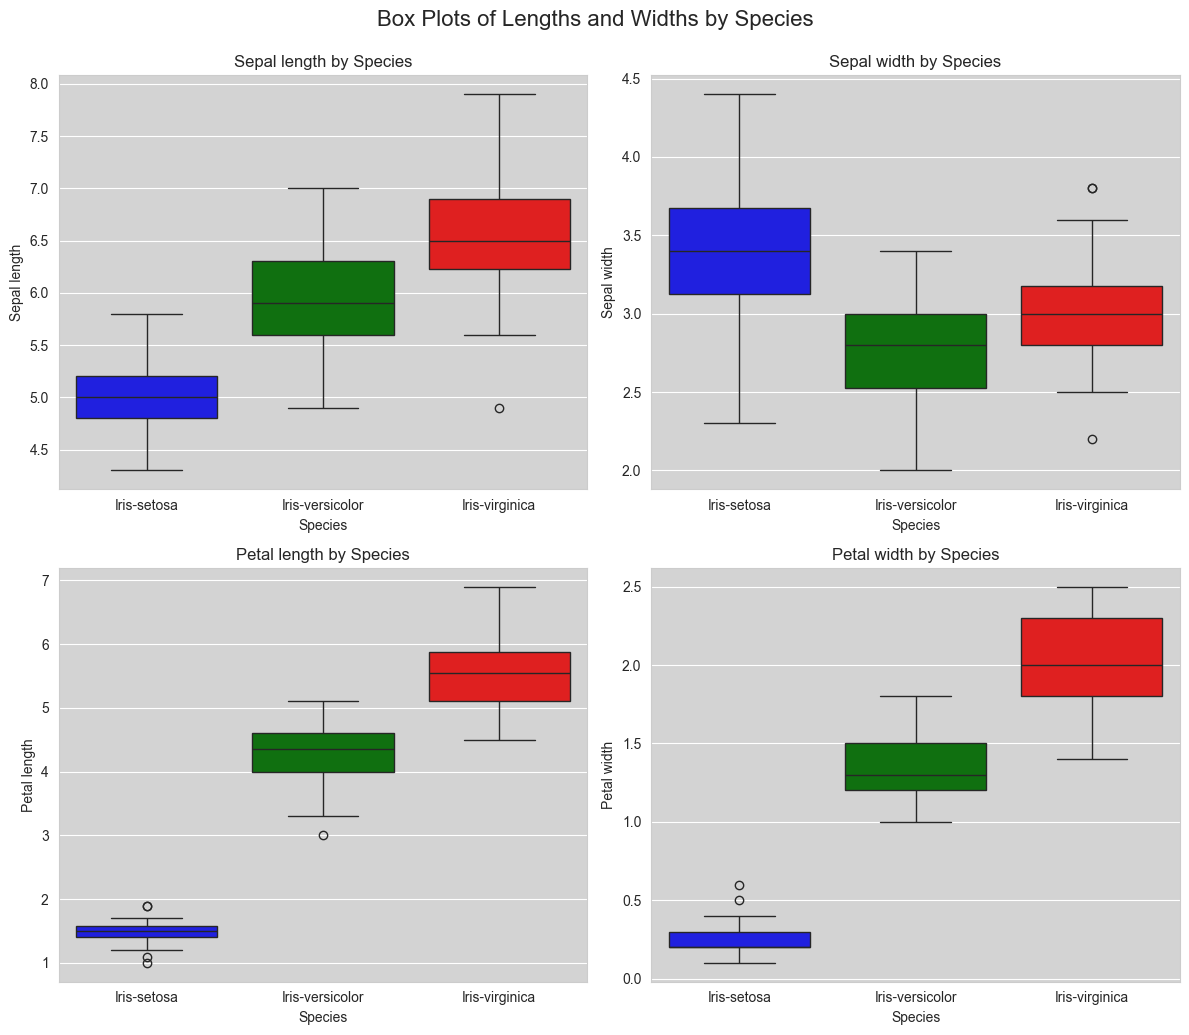

In [78]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

for var, ax in zip(numeric_columns, axes.flatten()):
    sns.boxplot(data=df, x='species', y=var, palette=['blue', 'green', 'red'], ax=ax)
    ax.set_title(f'{var.replace("_", " ").capitalize()} by Species')
    ax.set_xlabel('Species')
    ax.set_ylabel(var.replace('_', ' ').capitalize())

# Adjust layout
plt.tight_layout()
plt.suptitle('Box Plots of Lengths and Widths by Species', y=1.03, fontsize=16)
plt.show()

In the boxplots, we observe the distribution of sepal and petal dimensions. Based on these boxplots, we can draw the following conclusions:

- Setosa has a narrower and shorter petals and sepals with respect to the other two species. However it has wider sepals. 
- The variation is very low for the first three dimensions but it's worth mentioning that it's relatively high for the fourth boxplot. 
- Virginica has the largest petals, both in terms of width and length.
- The most distinguishing factor between the species is the petal dimensions. The boxplots make it rather evident that the separation between species for petal measurements compared to sepal measurements.

### Pairs-plot to review the realtionship between varibles 

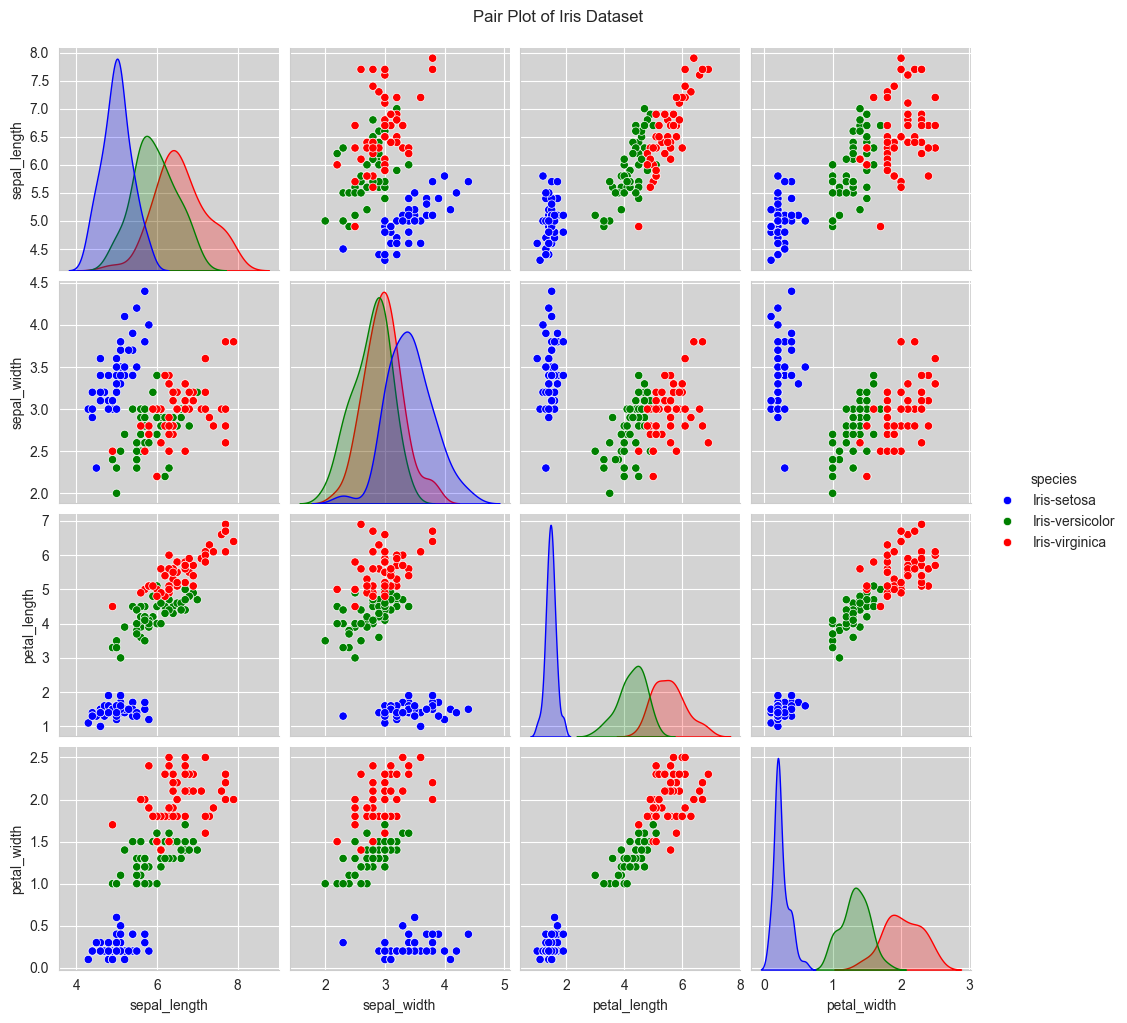

In [28]:
sns.pairplot(
    df, 
    hue='species', 
    palette=['blue', 'green', 'red'], 
    diag_kind='kde',  # Use 'hist' for histograms if preferred
    vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']  # Include relevant columns
)

plt.suptitle('Pair Plot of Iris Dataset', y=1.02)  # Add a title with padding
plt.show()

A good way to visualize how varibles relate to each other is with help of a good pairs-plot. In the figure above we can see the corresponding paris-plot for this dataset. Conclusions drawn from the plot:

- The species differ most in the distribution of petal width & length and least in sepal width, seen by the overlap in their empirical density curves in the plot on the diagonal.
- Versicolor and Virginica exhibit clearer correlations in their dimensions, making them easier to distinguish. In contrast, the Setosa shows a clear correlation only between sepal length & sepal width.
- The petal length and width of Setosa have relatively low variance, which is evident from the sharp peak in it's density curves.
- Versicolor and Virginica share more similarities with each other compared to Setosa, in terms of their dimensions.

# Observations of Bird species 

In [ ]:
df2 = pd.read_csv('artportalen.csv')
print("Missing values in each column:\n", df2.isnull().sum())


Missing values in each column:
 Id                            0
Taxonsorteringsordning        0
Rödlistade                17139
Artnamn                       0
Vetenskapligt namn            0
Auktor                       73
Antal                         0
Ålder/stadium             21159
Kön                       19893
Aktivitet                  5171
Lokalnamn                     0
Ostkoordinat                  0
Nordkoordinat                 0
Noggrannhet                   0
Diffusion                     0
Län                           0
Kommun                        0
Provins                       0
Församling                    0
Startdatum                    0
Starttid                   2563
Slutdatum                     0
Sluttid                    2563
Kommentar                 19204
Biotop                    21915
Rapportör                     0
Observatörer                  2
dtype: int64


Just for the sake of it looking at how many values we miss

### The most prevelant bird species

In [ ]:
df2['Antal'] = pd.to_numeric(df2['Antal'], errors='coerce') # making non numeric values, numeric
df2['Antal'] = df2['Antal'].fillna(0)  # Replace NaN with 0

df2 = df2.dropna(subset=['Antal']) 
prevalent_species = df2.groupby('Artnamn')['Antal'].sum().sort_values(ascending=False)
print("Most prevalent species:\n", prevalent_species.head())

Most prevalent species:
 Artnamn
Grönsiska        20211.0
Sothöna           8308.0
Gräsand           7167.0
Storskrake        6750.0
Vitkindad gås     6345.0
Name: Antal, dtype: float64


Something to keep in mind is that Grönsiska have very significant amount of apprences in the data frame 

### The monthly distribution of the top 3 most prevelant species

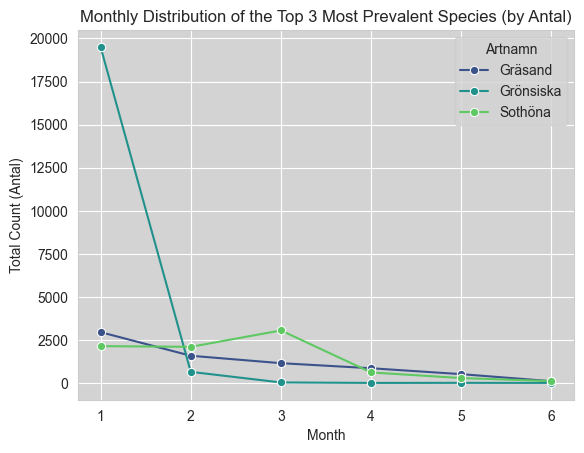

In [146]:
df2['Startdatum'] = pd.to_datetime(df2['Startdatum'], errors='coerce')
top_species = df2.groupby('Artnamn')['Antal'].sum().nlargest(3).index

monthly_species_data = (
    df2[df2['Artnamn'].isin(top_species)]
    .assign(Month=df2['Startdatum'].dt.month)
    .groupby(['Month', 'Artnamn'])['Antal']
    .sum()
    .reset_index()
)

# Plot the data
sns.lineplot(
    data=monthly_species_data,
    x='Month',
    y='Antal',
    hue='Artnamn',
    marker='o',
    palette='viridis'
)

# Customize the plot
plt.title('Monthly Distribution of the Top 3 Most Prevalent Species (by Antal)')
plt.xlabel('Month')
plt.ylabel('Total Count (Antal)')
plt.xticks(range(1, 7))  # Set x-axis to show months from 1 to 12
plt.grid(True)
plt.show()

A observation made from this plot is that most of the observations are made in the start of the year and tapers of at the end of the half year mark. 

### The rarest bird species

In [150]:
species_rarity = df2.groupby('Artnamn')['Antal'].sum().sort_values()

print(f'The Rarest species :\n {species_rarity.head(10)}')

The Rarest species :
 Artnamn
Ob. korsnäbb    0.0
Fjällvråk       1.0
Lappsparv       1.0
Varfågel        1.0
Gravand         1.0
Forsärla        1.0
Tornfalk        1.0
Spillkråka      1.0
Trädlärka       1.0
Ejder           1.0
Name: Antal, dtype: float64


A conclusion that can be drawn from this table is that the absolute rarest species is the Korsnäbb which hasn't been observed at all.

### Task 2.4

 - The most skilled bird watcher 

In [151]:
skilled_watchers = (
    df2.groupby('Rapportör')
    .agg(
        Total_Birds=('Antal', 'sum'),  # Total number of birds
        Days=('Startdatum', 'nunique'),  # Number of unique days
        Avg_Birds_Per_Day=('Antal', lambda x: x.sum() / x.nunique())  # Average birds per day
    )
    .sort_values(by='Total_Birds', ascending=False)  # Sort by total birds
)

# Display the table
print("Most Skilled Bird Watchers:")
print(skilled_watchers.head(10))

Most Skilled Bird Watchers:
                  Total_Birds  Days  Avg_Birds_Per_Day
Rapportör                                             
Svante Söderholm      50079.0    72         455.263636
Folke K Larsson        6875.0    96         129.716981
Johan Nilsson          4276.0    74         171.040000
Per Gullberg           3824.0    48         103.351351
Ari Määttä             3149.0    34         112.464286
Michael Löfroth        2745.0    13         114.375000
jesper sollerman       2488.0    91         108.173913
Magnus Edberg          2164.0    49          83.230769
Bill Martens           1966.0    42          75.615385
Per Thyberg            1883.0    49          67.250000


We can clearly see that Svante Söderholm is the most skilled Bird watcher by far, although he isn't the one who has been out in the field the most. The one how spent the most amount of days is Folke K Larsson with 96 days spent

- Fiskmåsen's location

In [171]:
fiskmas_data = df2[df2['Artnamn'] == 'Fiskmås']

# Group by location and sum the 'Antal' (number of birds observed)
location_counts = fiskmas_data.groupby('Lokalnamn')['Antal'].sum().reset_index()

# Sort by the total number of birds observed and get the top 10 locations
top_10_locations = location_counts.sort_values(by='Antal', ascending=False).head(10)

# Display the table
print("Top 10 Locations for Fiskmås Observations:")
print(top_10_locations)

Top 10 Locations for Fiskmås Observations:
                         Lokalnamn  Antal
26                    Isbladsviken  204.0
36                 Ladugårdsgärdet  169.0
21                       Hundudden  122.0
28                     Kaknäs skär  114.0
53                        Saltsjön  100.0
31                   Kastellholmen   80.0
56  Skeppsholmen och Kastellholmen   43.0
80                        Ålkistan   33.0
62             Sportfältet, Gärdet   30.0
3                       Bergshamra   29.0


We can see that the Bird Fiskmås has been observed at locations near the water mostly and that is a very logical conclusion otherwise something would be very wrong with the dataframe

- At what time is the birds spoted

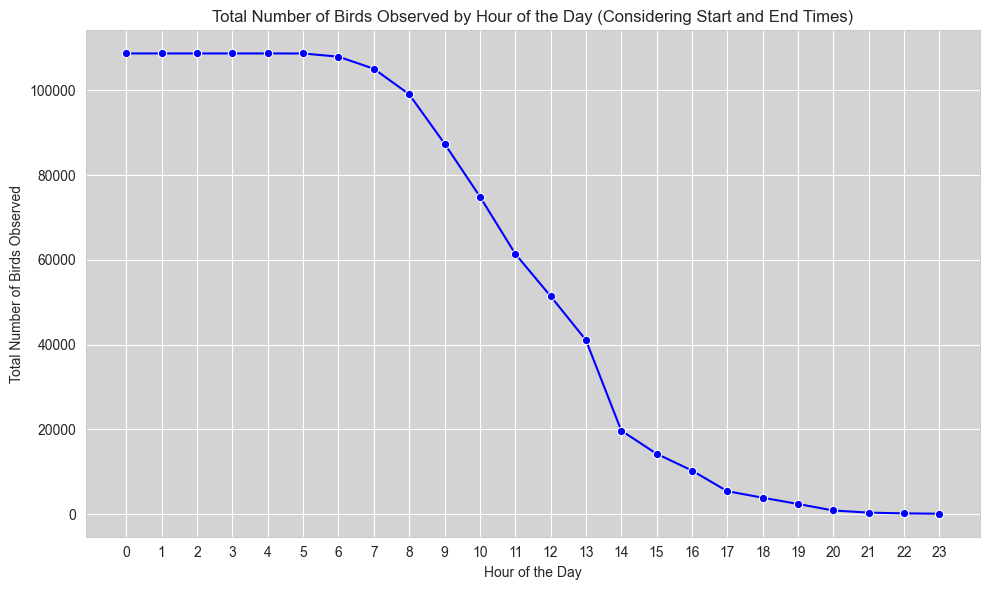

In [183]:
df2['Starttid'] = pd.to_datetime(df2['Starttid'], errors='coerce')
df2['Sluttid'] = pd.to_datetime(df2['Sluttid'], errors='coerce')

# Ensure 'Antal' is numeric, converting invalid values to NaN and filling them with 0
df2['Antal'] = pd.to_numeric(df2['Antal'], errors='coerce').fillna(0)

# Initialize an empty list to store the hourly bird count data
hourly_counts = []

# Iterate through each row in the DataFrame
for idx, row in df2.iterrows():
    # Skip rows with invalid 'Starttid' or 'Sluttid'
    if pd.isna(row['Starttid']) or pd.isna(row['Sluttid']):
        continue  # Skip this row if start or end time is invalid
    
    # Extract the start and end hour
    start_hour = row['Starttid'].hour
    end_hour = row['Sluttid'].hour
    
    # If the observation spans across hours, loop through the hours and add data
    for hour in range(start_hour, end_hour + 1):
        hourly_counts.append({'Hour': hour, 'Antal': row['Antal']})

# Convert the list of dictionaries into a DataFrame
hourly_data = pd.DataFrame(hourly_counts)

# Group by the 'Hour' and sum the 'Antal' to get the total number of birds observed each hour
hourly_data_sum = hourly_data.groupby('Hour')['Antal'].sum().reset_index()

# Create the plot for total number of birds observed by hour of the day
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_data_sum, x='Hour', y='Antal', marker='o', color='b')

# Customize the plot
plt.title('Total Number of Birds Observed by Hour of the Day (Considering Start and End Times)')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Number of Birds Observed')
plt.xticks(range(0, 24))  # Show all hours from 0 to 23
plt.grid(True)
plt.tight_layout()
plt.show()

And the reason for this plot looking like this is because every starttid and sluttid is exactly the same hence the observations tapering of at the end

# Predicting Strokes

### Strokes with Age taken into account

C:\Users\tonyf\AppData\Local\Temp\ipykernel_17032\1788001765.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['age'].fillna(df3['age'].median(), inplace=True)  # Filling missing 'age' with median
C:\Users\tonyf\AppData\Local\Temp\ipykernel_17032\1788001765.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

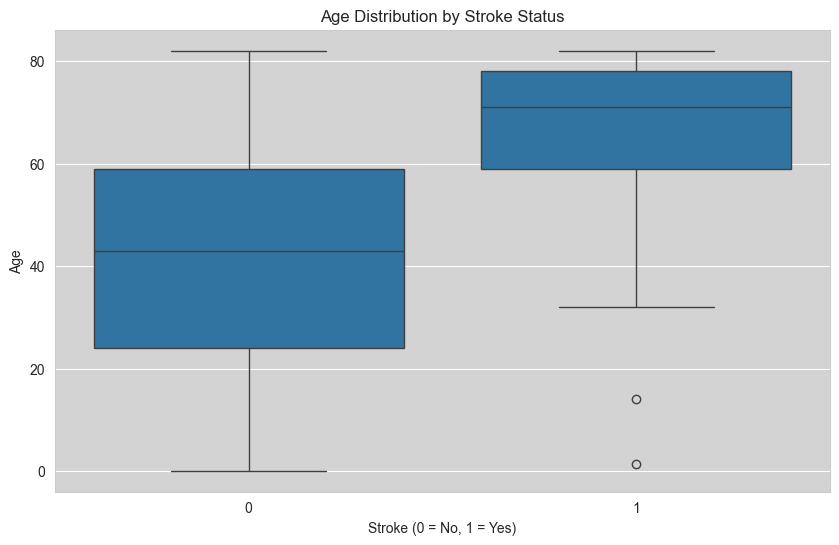

In [188]:
df3 = pd.read_csv('stroke-data2.csv')

df3['age'].fillna(df3['age'].median(), inplace=True)  # Filling missing 'age' with median
df3['stroke'].fillna(0, inplace=True)  # Filling missing 'stroke' with 0 (assuming no stroke)

# Box plot to show age distribution for people with and without stroke
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='age', data=df3)
plt.title('Age Distribution by Stroke Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

And by this boxplot we can tell that the majority of people having strokes are at the age between 60-80 years old which isn't that suprising but that is still a rather interesting observation. Altough there are some outliers which can indicate that the person in question maybe had some other condition. That needs further investigation. 

### Does weight correspond to Heartdieases

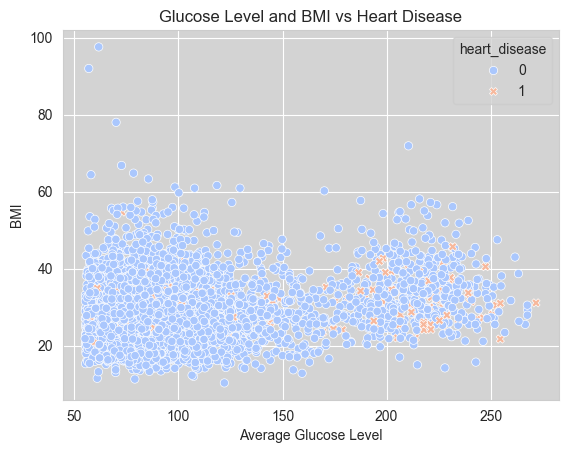

In [186]:

sns.scatterplot(data=df3, x='avg_glucose_level', y='bmi', hue='heart_disease', style='heart_disease', palette='coolwarm')
plt.title('Glucose Level and BMI vs Heart Disease')
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.show()

With this scatterplot we can see that people in question with a very high glucose level has a tendisty to have a heart diease and that can be due to diabetes and a poor diet choice. But we can also see that the BMI level doesn't correspond to any heart dieases that clearly. But we also see that people with a very low BMI & Glucose level have some heart dieases, the reason to this can be due to people born with a heart dieases. In conclusion you can draw conclusive statements about the correlation between these two parameters but there maybe some underlying parameters that are not taken into account.   

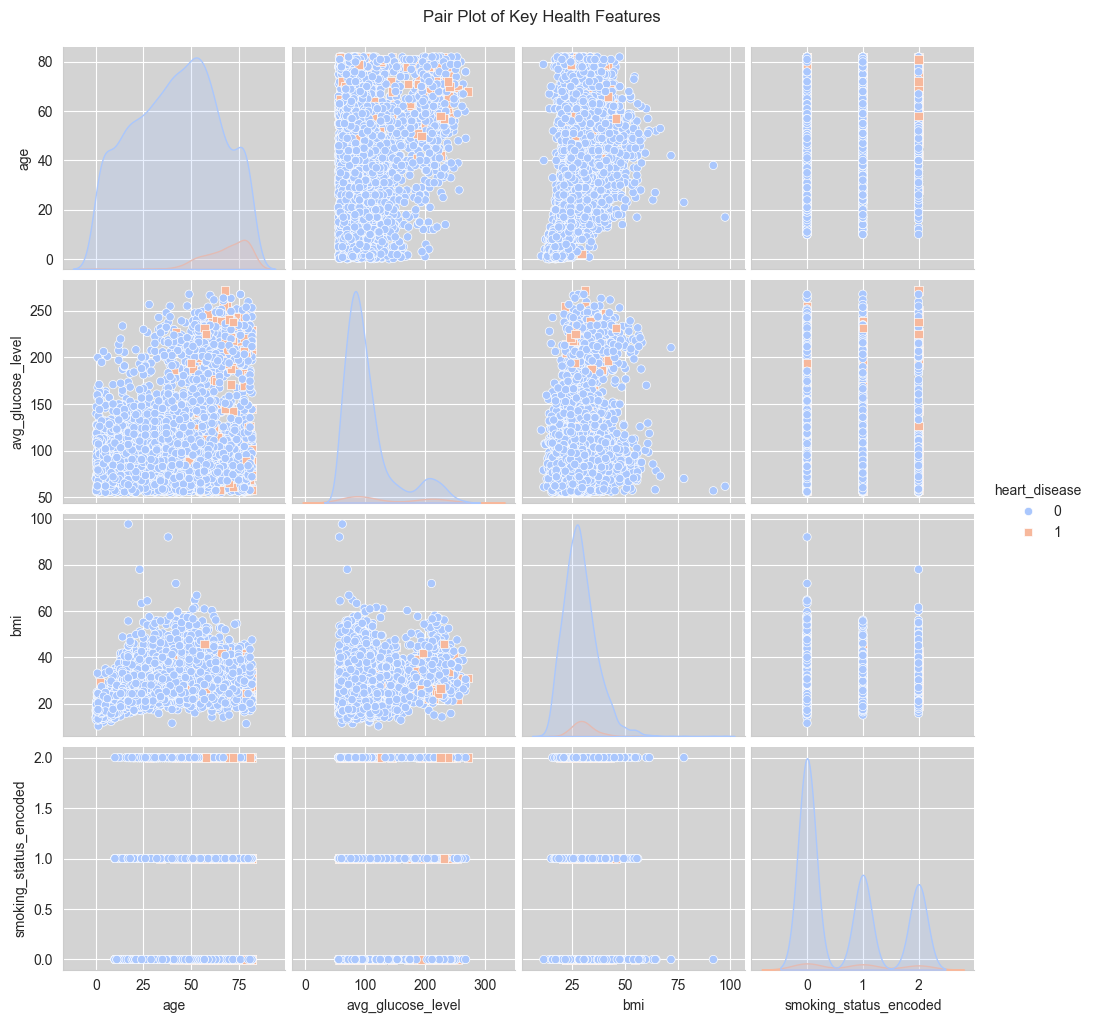

In [135]:
df3['smoking_status_encoded'] = df3['smoking_status'].map({
    'never smoked': 0,
    'formerly smoked': 1,
    'smokes': 2
})

# Select features of interest
features = ['age', 'avg_glucose_level', 'bmi', 'smoking_status_encoded', 'heart_disease']

# Create pair plot
sns.pairplot(
    data=df3[features],
    hue='heart_disease',  # Color by heart disease status
    palette='coolwarm',
    diag_kind='kde',  # KDE plot on the diagonal
    markers=['o', 's']  # Different markers for different heart disease status
)

# Add a title
plt.suptitle('Pair Plot of Key Health Features', y=1.02)  # Adjust y for better spacing
plt.show()

We can see that these parameters that have been looked at in this pairs-plot have correlation to eachother and this gives a insight to how diffrent lifestyles can effect the health of the humanbody and potentially give dieseases that are not currable. 

# Cleaning Data

### Loading data & Missing values

In [4]:
df4 = pd.read_csv('cell_phones_total.csv')
print(f'Missing values in each column:\n {df4.isnull().sum()}')
#identidying how many columns are missing a value in it's cell for my own sake


Missing values in each column:
 iso-3      0
1960      14
1965      14
1966     214
1967     214
1968     214
1969     214
1970      14
1971     214
1972     214
1973     214
1974     214
1975      14
1976      14
1977      14
1978      14
1979      14
1980      14
1981      15
1982      15
1983      16
1984      18
1985      19
1986      18
1987      20
1988      19
1989      21
1990       7
1991      18
1992      16
1993      16
1994      16
1995      14
1996      13
1997      14
1998      12
1999      11
2000      10
2001      10
2002       8
2003       8
2004       7
2005      10
2006      13
2007      10
2008      12
2009      10
2010       7
2011      11
2012       7
2013      10
2014       9
2015       7
2016      12
2017      10
2018      32
2019      71
dtype: int64


In [7]:
def convert_to_numeric(value):
    '''
    Convert all values in the DataFrame to numeric values instead.
    '''
    if isinstance(value, str):
        value = value.replace('k', 'e3').replace('M', 'e6')  # Convert 'k' to 'e3', 'M' to 'e6'
    try:
        return pd.to_numeric(value, errors='coerce')  # invalid values become NaN values instead
    except:
        return None  # In case of invalid conversion which occurred, it returns None and will become a NaN value  

# Create a copy of the DataFrame and apply numeric conversion
df4_numeric = df4.copy()
df4_numeric.iloc[:, 1:] = df4_numeric.iloc[:, 1:].applymap(convert_to_numeric)

# Fill missing values based on column characteristics
df4_filled = df4_numeric.copy()

for col in df4_filled.columns[1:]:  # Skip 'iso-3' column
    # Check if column contains only 0 and NaN values
    if ((df4_filled[col] == 0).sum() + df4_filled[col].isnull().sum()) == len(df4_filled[col]):
        # Replace all NaN values with 0
        df4_filled[col] = df4_filled[col].fillna(0)
    else:
        # Replace NaN values with the previous value (forward fill)
        df4_filled[col] = df4_filled[col].fillna(method='ffill')

# Verify the filled data
print("Data after filling NaN values:")
print(df4_filled.head())

C:\Users\tonyf\AppData\Local\Temp\ipykernel_23960\4071258338.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df4_numeric.iloc[:, 1:] = df4_numeric.iloc[:, 1:].applymap(convert_to_numeric)
C:\Users\tonyf\AppData\Local\Temp\ipykernel_23960\4071258338.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df4_filled[col] = df4_filled[col].fillna(method='ffill')
C:\Users\tonyf\AppData\Local\Temp\ipykernel_23960\4071258338.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4_filled[col] = df4_filled[col].fillna(method='ffill')


Data after filling NaN values:
  iso-3  1960  1965  1966  1967  1968  1969  1970  1971  1972  ...  \
0   ABW   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1   AFG   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2   AGO   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3   ALB   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4   AND   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

         2010        2011        2012        2013        2014        2015  \
0    132000.0         NaN    135000.0    139000.0    140000.0    141000.0   
1  10200000.0  13800000.0  15300000.0  16800000.0  18400000.0  19700000.0   
2   9400000.0  12100000.0  12800000.0  13300000.0  14100000.0  13900000.0   
3   2690000.0   3100000.0   3500000.0   3690000.0   3360000.0   3400000.0   
4     65500.0     65000.0     63900.0     63900.0     66200.0     71300.0   

         2016        2017        2018        2019  
0         NaN         NaN        

I've analyzed the dataset and i have rewied it in detail and hade to make small adjustments to threshold so that i don't remove any nescery data in the csv file. So if one analyses the csv file and data within it, one should notice that we have data that is either a 0.0 or NaN value until the year 1980. In my opinion it is okay to remove the data with empty columns and 0.0 values because if there are any future calculations or analysis of the dataframe these values will be a more complicated to manage. But for the sake of keeping the original structure of the DataFrame i've instead used forward and backwardsfilling to cloumns only consisting of missing values or zeros and replacing the NaN values with zeros. If a column has NaN or zeros we replace the missing values with previous values instead using backwards and foward filling.